In [1]:
# 현재 디렉토리 확인
import os
print(os.getcwd())

# 라이브러리
import os
import numpy as np
import pandas as pd
import seaborn as sns

# 부동소수점 표기 제거
pd.options.display.float_format = '{:.3f}'.format

# 모든 출력을 전부 보여주는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# pyplot 한글 처리하는 코드
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,8)

# matplotlib 한글 처리
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

C:\DataScience\School_CCTV_Bigdata\Clustering\김은영


# 데이터 병합
- 서울시_경찰관서 통계.csv
- 서울시 CCTV 설치운영 현황(자치구)-목적별.csv
- 서울시고등학교_교육여건_상담.xlsx
- 서울시고등학교_교육여건_합본.xlsx

## - 서울시_경찰관서 통계.csv

In [2]:
# 경찰 관서 데이터 
police = pd.read_csv('./Data/가공_data/서울시_경찰관서 통계.csv', encoding='cp949', index_col=0)

# 결측치 전처리
police.isnull().sum() # null 값 없음
# police.sum() #이상치 - 발견
police = police.replace('-', 0) # 없음을 뜻하는 - => 0으로 변환

# 시설 총합을 구하는 시설총합 컬럼 생성
police['시설총합']=police.iloc[:,3:8].sum(axis=1)

# 2019년 자료만 가져오기
police=police.loc[police['기간']==2019]

# 컬럼명 변경 기간 => 연도
police.columns = ['연도', '구', '경찰청', '경찰서', '지구대파출소치안센터', '소방본부', '소방서', '119안전센터','시설총합']

police = police.reset_index(drop=True)
police.shape # 합계 포함하여 (26, 9)
police

기간            0
자치구           0
경찰청           0
경찰서           0
지구대파출소치안센터    0
소방본부          0
소방서           0
119안전센터       0
dtype: int64

(26, 9)

,연도,구,경찰청,경찰서,지구대파출소치안센터,소방본부,소방서,119안전센터,시설총합
0,2019,합계,2,31,410,1,24,118,528
1,2019,종로구,1,2,23,0,1,6,29
2,2019,중구,0,2,18,1,1,5,23
3,2019,용산구,0,1,12,0,1,5,17
4,2019,성동구,0,1,15,0,1,4,19
5,2019,광진구,0,1,12,0,1,3,15
6,2019,동대문구,0,1,20,0,1,5,25
7,2019,중랑구,0,1,17,0,1,4,21
8,2019,성북구,0,2,24,0,1,4,28
9,2019,강북구,0,1,14,0,1,4,18


In [3]:
police.to_csv('경찰관서_2019.csv', encoding='cp949')

### police 데이터 시각화 

#### box plot

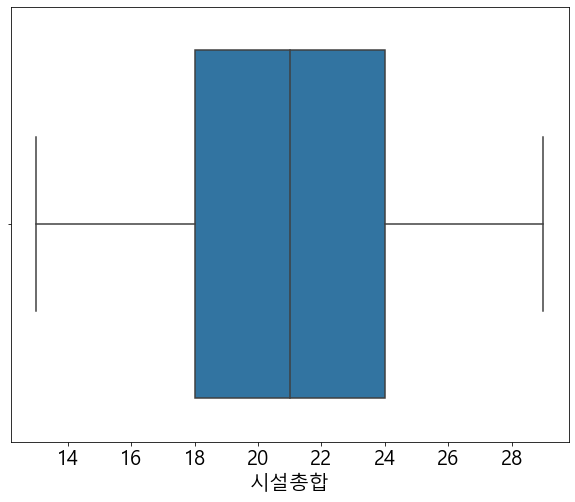

In [4]:
sns.boxplot(x = "시설총합",  data = police[1:])

#### bar plot

##### 시설총합

<Figure size 2160x720 with 0 Axes>

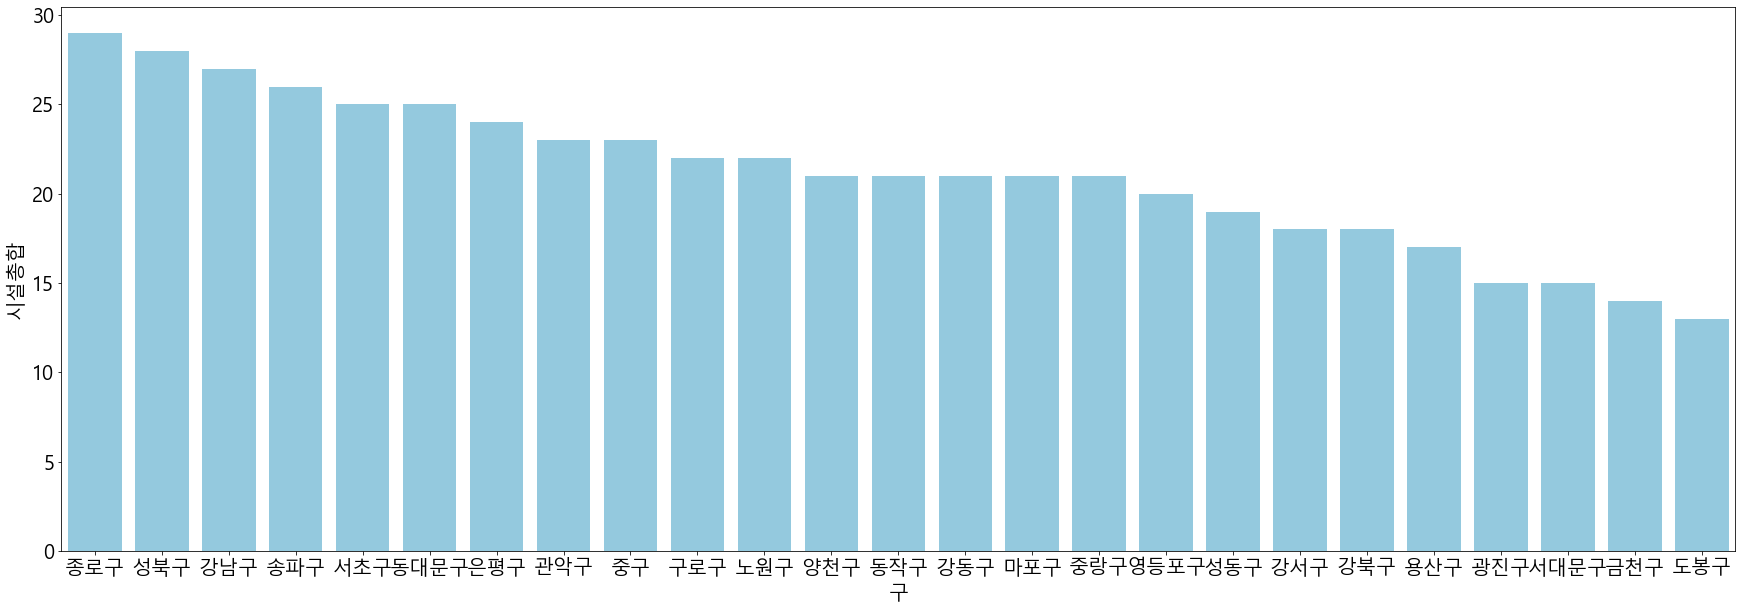

In [5]:
plt.figure(figsize=(30,10))
data=police[1:].sort_values(by='시설총합', ascending=False)
sns.barplot(x='구',y='시설총합',data=data, color='skyblue')

##### 지구대파출소치안센터   

<Figure size 2160x720 with 0 Axes>

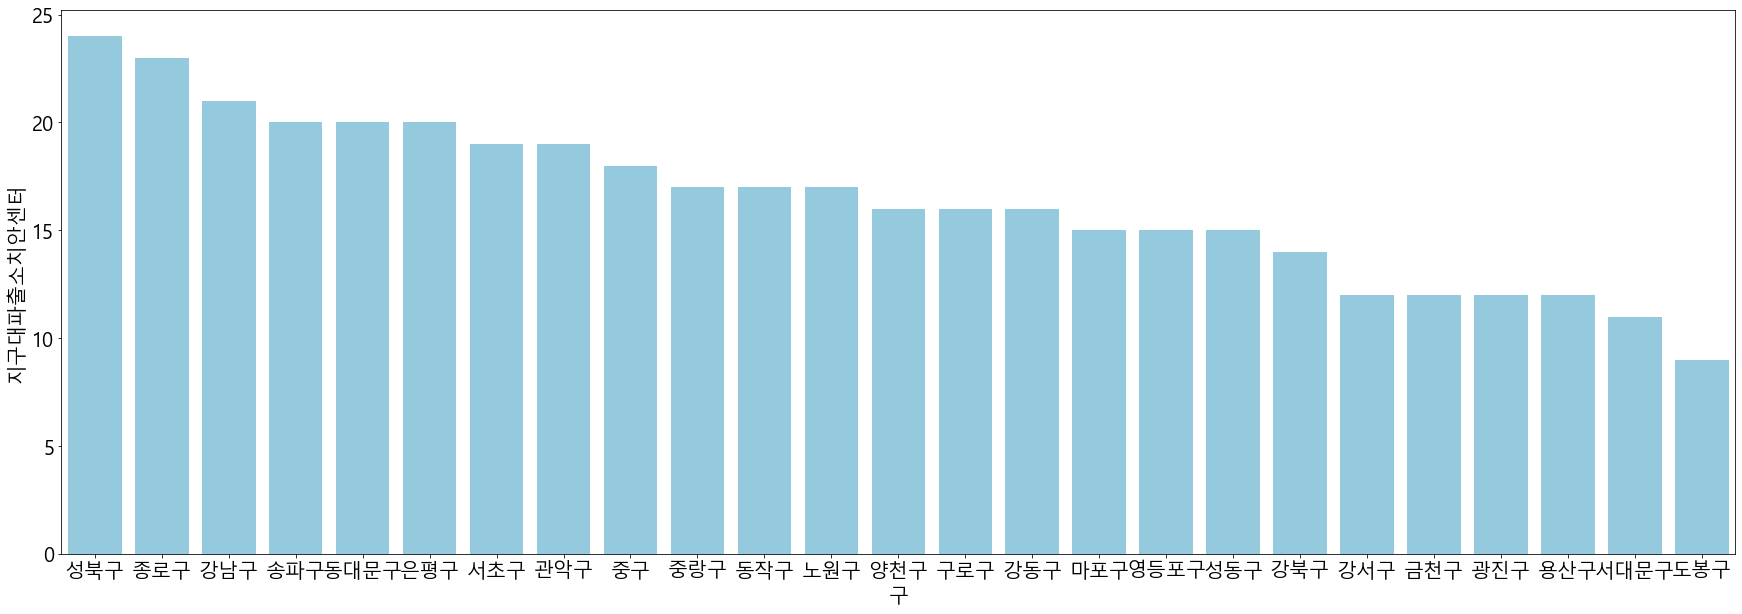

In [6]:
plt.figure(figsize=(30,10))
data=police[1:].sort_values(by='지구대파출소치안센터', ascending=False)
sns.barplot(x='구',y='지구대파출소치안센터',data=data, color='skyblue')

## CCTV

In [7]:
cctv = pd.read_csv('./Data/가공_data/서울시 CCTV 설치운영 현황(자치구)-목적별.csv', encoding='cp949', header=0).reset_index(drop=True)

# 특수문자 제거
cctv.columns = ['구', 'cctv_총계', '방범', '어린이보호구역', '공원놀이터', '쓰레기무단투기', '시설안전화재예방','교통단속', '교통정보수집분석', '기타다른법령']

cctv['cctv_총계'] = cctv['cctv_총계'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['방범']=cctv['방범'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['어린이보호구역']=cctv['어린이보호구역'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['공원놀이터']=cctv['공원놀이터'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['쓰레기무단투기']=cctv['쓰레기무단투기'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['시설안전화재예방'] = cctv['시설안전화재예방'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)
cctv['교통단속'] = cctv['교통단속'].str.replace(pat=r'[^A-Za-z0-9]', repl= r'', regex=True)

# str => int로 형변환
cctv['cctv_총계']= pd.to_numeric(cctv['cctv_총계'])
cctv['방범']= pd.to_numeric(cctv['방범'])
cctv['어린이보호구역']= pd.to_numeric(cctv['어린이보호구역'])
cctv['공원놀이터']= pd.to_numeric(cctv['공원놀이터'])
cctv['쓰레기무단투기']= pd.to_numeric(cctv['쓰레기무단투기'])
cctv['시설안전화재예방']= pd.to_numeric(cctv['시설안전화재예방'])
cctv['교통단속']= pd.to_numeric(cctv['교통단속'])

# 구 컬럼 ~구로 끝나지 않는 값 ~구 형식으로 변경
chage_gu_dic = {'동대문':'동대문구', '서대문':'서대문구','영등포':'영등포구'}
cctv = cctv.replace({'구':chage_gu_dic})

cctv.shape # 계 행을 포함하여 (26, 2)
cctv.isnull().sum() # null값 없음
cctv.info()

(26, 10)

구           0
cctv_총계     0
방범          0
어린이보호구역     0
공원놀이터       0
쓰레기무단투기     0
시설안전화재예방    0
교통단속        0
교통정보수집분석    0
기타다른법령      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구         26 non-null     object
 1   cctv_총계   26 non-null     int64 
 2   방범        26 non-null     int64 
 3   어린이보호구역   26 non-null     int64 
 4   공원놀이터     26 non-null     int64 
 5   쓰레기무단투기   26 non-null     int64 
 6   시설안전화재예방  26 non-null     int64 
 7   교통단속      26 non-null     int64 
 8   교통정보수집분석  26 non-null     int64 
 9   기타다른법령    26 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.2+ KB


In [8]:
cctv

,구,cctv_총계,방범,어린이보호구역,공원놀이터,쓰레기무단투기,시설안전화재예방,교통단속,교통정보수집분석,기타다른법령
0,총 계,75431,52359,7711,5942,1258,2012,5439,31,679
1,종로구,1729,1360,41,109,0,110,109,0,0
2,중구,2001,1180,75,165,62,62,290,8,159
3,용산구,2383,1740,164,154,0,0,252,0,73
4,성동구,3515,2834,0,177,151,15,338,0,0
5,광진구,2556,2011,301,98,71,5,70,0,0
6,동대문구,2315,1682,282,174,28,1,134,0,14
7,중랑구,3285,2872,141,141,11,54,66,0,0
8,성북구,3754,2489,400,192,359,108,183,23,0
9,강북구,2462,1831,319,187,0,32,93,0,0


## 서울시고등학교_교육여건_상담

In [9]:
wee_class = pd.read_excel('./Data/가공_data/서울시고등학교_교육여건_상담.xlsx').reset_index(drop=True)
wee_class

,구,학교명,학교코드,내부상담_실시여부,외부상담_실시여부,wee클래스_운영여부,학교폭력_예방교육_평균교육시간(1학급당)
0,강남구,개포고등학교,S010000373,1,1,1,382.400
1,강남구,경기고등학교,S010000375,1,0,1,152.400
2,강남구,경기여자고등학교,S010000376,1,1,1,200.000
3,강남구,국립국악고등학교,S000003540,0,0,0,217.400
4,강남구,단국대학교부속소프트웨어고등학교,S010000581,0,1,0,300.000
...,...,...,...,...,...,...,...
315,성동구,무학여자고등학교,S010000436,1,1,1,253.300
316,성동구,서울방송고등학교,S010000585,1,1,1,87.600
317,성동구,성수고등학교,S010005523,1,1,1,406.600
318,성동구,성수공업고등학교,S010000592,1,0,1,306.500


### 구별 학교폭력 예방교육 평균시간, wee class 운영여부

In [10]:
wee_class_1 = wee_class.groupby('구').agg({'내부상담_실시여부':'mean','외부상담_실시여부':'mean','학교폭력_예방교육_평균교육시간(1학급당)':'sum', 'wee클래스_운영여부':'mean'}).reset_index()
wee_class_1

,구,내부상담_실시여부,외부상담_실시여부,학교폭력_예방교육_평균교육시간(1학급당),wee클래스_운영여부
0,강남구,0.727,0.727,7886.100,0.682
1,강동구,0.929,0.786,4069.400,0.929
2,강북구,0.857,0.857,3604.300,0.857
3,강서구,0.783,0.783,11274.500,0.739
4,관악구,0.706,0.824,7750.600,0.765
5,광진구,0.889,0.444,2687.500,0.667
6,구로구,0.786,0.786,4077.100,0.571
7,금천구,0.667,0.833,1328.200,0.833
8,노원구,0.880,0.640,7958.700,0.840
9,도봉구,1.000,0.800,3782.200,0.800


### 구별 학교수 count

In [11]:
wee_class_2 = wee_class.value_counts(['구']).reset_index(name='학교수') 
wee_class_2

,구,학교수
0,노원구,25
1,강서구,23
2,강남구,22
3,송파구,19
4,은평구,18
5,관악구,17
6,양천구,15
7,종로구,14
8,구로구,14
9,강동구,14


In [12]:
wee_class = pd.merge(wee_class_1, wee_class_2, how='inner', on='구')
wee_class

,구,내부상담_실시여부,외부상담_실시여부,학교폭력_예방교육_평균교육시간(1학급당),wee클래스_운영여부,학교수
0,강남구,0.727,0.727,7886.100,0.682,22
1,강동구,0.929,0.786,4069.400,0.929,14
2,강북구,0.857,0.857,3604.300,0.857,7
3,강서구,0.783,0.783,11274.500,0.739,23
4,관악구,0.706,0.824,7750.600,0.765,17
5,광진구,0.889,0.444,2687.500,0.667,9
6,구로구,0.786,0.786,4077.100,0.571,14
7,금천구,0.667,0.833,1328.200,0.833,6
8,노원구,0.880,0.640,7958.700,0.840,25
9,도봉구,1.000,0.800,3782.200,0.800,10


## 서울시고등학교_교육여건_합본

In [13]:
assult = pd.read_excel('./Data/가공_data/서울시고등학교_교육여건_합본.xlsx')

In [14]:
assult=assult.groupby(['구']).agg({'개최횟수':'sum','가해학생수':'sum','신체폭력':'sum','언어폭력':'sum','금품갈취':'sum','강요':'sum','따돌림':'sum','성폭력':'sum','사이버폭력':'sum','기타':'sum'
}).sort_values(by='개최횟수', ascending=False).reset_index()
assult

,구,개최횟수,가해학생수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타
0,노원구,132,112,56,37,2,5,8,23,6,3
1,강서구,110,89,31,15,3,3,5,5,6,6
2,강남구,107,50,32,14,0,1,0,8,7,0
3,은평구,102,78,32,16,3,3,3,11,2,1
4,송파구,86,71,30,25,2,2,2,10,7,3
5,성북구,85,69,20,12,2,6,4,11,12,1
6,구로구,83,65,29,22,2,1,1,9,8,4
7,관악구,82,45,28,6,0,6,4,8,4,2
8,양천구,74,48,29,18,3,3,4,5,3,1
9,종로구,72,40,22,12,1,1,1,3,4,0


In [15]:
assult['구'].unique()

array(['노원구', '강서구', '강남구', '은평구', '송파구', '성북구', '구로구', '관악구', '양천구',
       '종로구', '강동구', '용산구', '서초구', '동대문구', '중구', '중랑구', '성동구', '영등포구',
       '도봉구', '마포구', '동작구', '금천구', '광진구', '강북구', '서대문구'], dtype=object)

### 구별 폭력 횟수 bar 플롯

([<matplotlib.axis.YTick at 0x22b391ea688>,
 <a list of 25 Text yticklabel objects>)

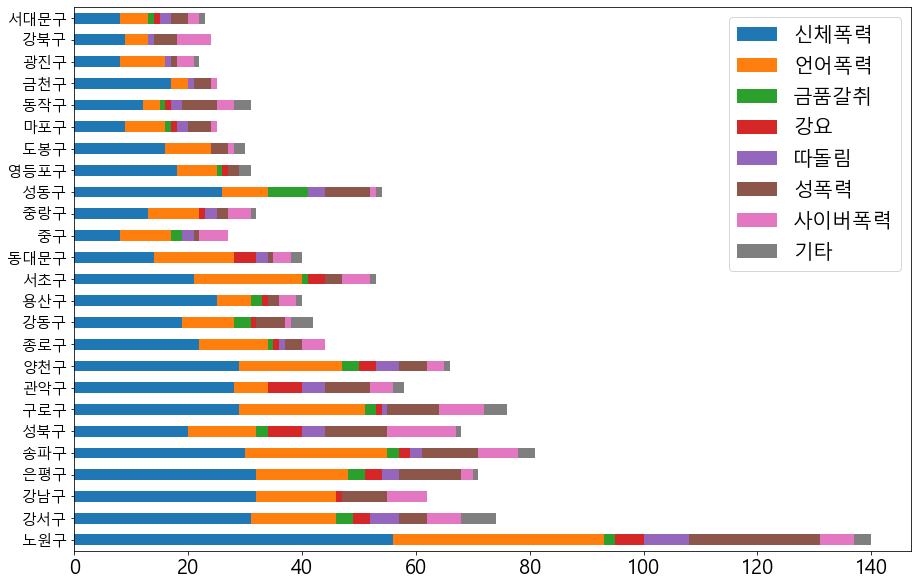

In [16]:
temp = assult[['구', '신체폭력', '언어폭력', '금품갈취', '강요', '따돌림', '성폭력', '사이버폭력', '기타']]
temp.plot(kind='barh', figsize=(15, 10), stacked=True)
label = ['노원구', '강서구', '강남구', '은평구', '송파구', '성북구', '구로구', '관악구', '양천구',
         '종로구', '강동구', '용산구', '서초구', '동대문구', '중구', '중랑구', '성동구', '영등포구',
         '도봉구', '마포구', '동작구', '금천구', '광진구', '강북구', '서대문구']
index = np.arange(len(label))
plt.yticks(index, label, fontsize=15)

## 최종 합본 데이터셋

In [17]:
temp1 = pd.merge(assult, wee_class, how='inner', on='구')
temp2 = pd.merge(police, cctv, how='inner', on='구')
final = pd.merge(temp1, temp2, how='inner', on='구')

## 경감지표.csv 생성

In [18]:
final.to_csv('./Data/최종데이터/경감지표.csv', encoding='cp949')

# EDA
## 상관성 heatmap

In [20]:
corr_table=final.corr()
corr_table.drop(['연도'], axis=0, inplace=True)
corr_table.drop(['연도',], axis=1,inplace=True)
corr_table

,개최횟수,가해학생수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,...,시설총합,cctv_총계,방범,어린이보호구역,공원놀이터,쓰레기무단투기,시설안전화재예방,교통단속,교통정보수집분석,기타다른법령
개최횟수,1.000,0.902,0.895,0.761,0.262,0.614,0.568,0.752,0.527,0.415,...,0.508,0.372,0.240,0.443,0.485,0.157,0.269,0.072,0.106,0.161
가해학생수,0.902,1.000,0.875,0.793,0.372,0.566,0.586,0.773,0.450,0.547,...,0.316,0.093,-0.062,0.276,0.360,0.266,0.137,0.009,0.156,0.066
신체폭력,0.895,0.875,1.000,0.788,0.367,0.517,0.581,0.822,0.305,0.384,...,0.310,0.301,0.167,0.352,0.481,0.138,0.240,0.123,-0.107,0.066
언어폭력,0.761,0.793,0.788,1.000,0.224,0.471,0.520,0.718,0.458,0.369,...,0.436,0.103,-0.081,0.287,0.504,0.030,0.059,0.169,-0.021,0.142
금품갈취,0.262,0.372,0.367,0.224,1.000,0.020,0.330,0.320,-0.048,0.255,...,0.064,0.003,0.028,-0.105,0.062,0.162,-0.216,0.052,0.088,-0.007
강요,0.614,0.566,0.517,0.471,0.020,1.000,0.659,0.542,0.459,0.266,...,0.498,0.280,0.149,0.327,0.221,0.490,0.547,0.004,0.385,-0.235
따돌림,0.568,0.586,0.581,0.520,0.330,0.659,1.000,0.699,0.305,0.299,...,0.146,-0.038,-0.099,0.073,0.225,0.410,0.207,-0.317,0.208,-0.239
성폭력,0.752,0.773,0.822,0.718,0.320,0.542,0.699,1.000,0.429,0.292,...,0.320,0.233,0.085,0.306,0.544,0.377,0.256,-0.044,0.156,0.004
사이버폭력,0.527,0.450,0.305,0.458,-0.048,0.459,0.305,0.429,1.000,0.139,...,0.541,0.309,0.177,0.289,0.300,0.402,0.209,0.121,0.606,0.353
기타,0.415,0.547,0.384,0.369,0.255,0.266,0.299,0.292,0.139,1.000,...,-0.068,-0.095,-0.117,0.023,0.092,0.004,0.013,-0.193,-0.151,0.016


In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(corr_table, annot=True,fmt = '.2f', linewidths=.5)